SEMMA has five steps (Sample, Explore, Modify, Model, and Assess), earning the acronym of SEMMA. You can use the SEMMA data mining methodology to solve a wide range of business problems, including fraud identification, customer retention and turnover, database marketing, customer loyalty, bankruptcy forecasting, market segmentation, as well as risk, affinity, and portfolio analysis.

## Step 1:
Install the Kaggle API and Set Up API Credentials

In [2]:
# Install the Kaggle API
!pip install kaggle

# Make a directory to store the Kaggle API key
!mkdir -p ~/.kaggle

# Move the kaggle.json file to the correct location and set the required permissions
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


## Step 2:
Download the HR Analytics Dataset Using Kaggle API

In [3]:
# Download the HR Analytics dataset from Kaggle
!kaggle datasets download -d arashnic/hr-analytics-job-change-of-data-scientists

# Unzip the dataset
!unzip hr-analytics-job-change-of-data-scientists.zip


Dataset URL: https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists
License(s): CC0-1.0
100% 295k/295k [00:00<00:00, 644kB/s]
100% 295k/295k [00:00<00:00, 643kB/s]
Archive:  hr-analytics-job-change-of-data-scientists.zip
  inflating: aug_test.csv            
  inflating: aug_train.csv           
  inflating: sample_submission.csv   


Let’s begin with the Sample phase of the SEMMA methodology.

## Phase 1: Sample
In this phase, we will take a portion of the dataset for analysis. Since this is a structured dataset, we'll load the data and take a look at its structure and size.

In [4]:
# Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('aug_train.csv')

# Display the first few rows of the dataset to understand its structure
df.head()

# Get the shape of the dataset
print("Shape of the dataset:", df.shape)

# Check for any missing values
print("Missing values in each column:")
print(df.isnull().sum())


Shape of the dataset: (19158, 14)
Missing values in each column:
enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64


### Phase 2: Explore
In this phase, we’ll explore the dataset to discover patterns and relationships within the data. We’ll visualize some key features, examine their distributions, and check correlations.

<ipython-input-6-efd76719a466>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


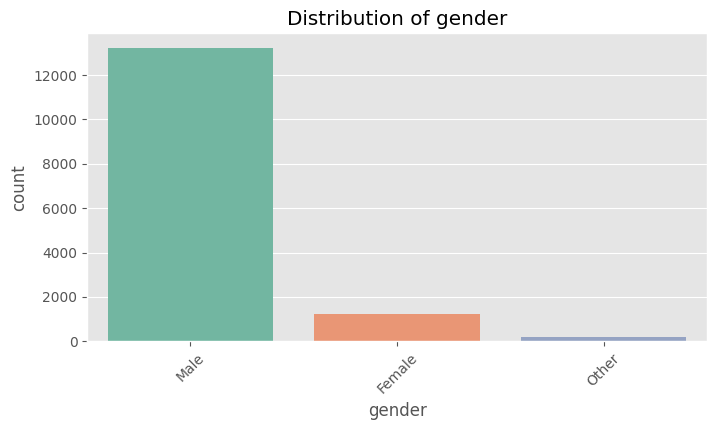

<ipython-input-6-efd76719a466>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


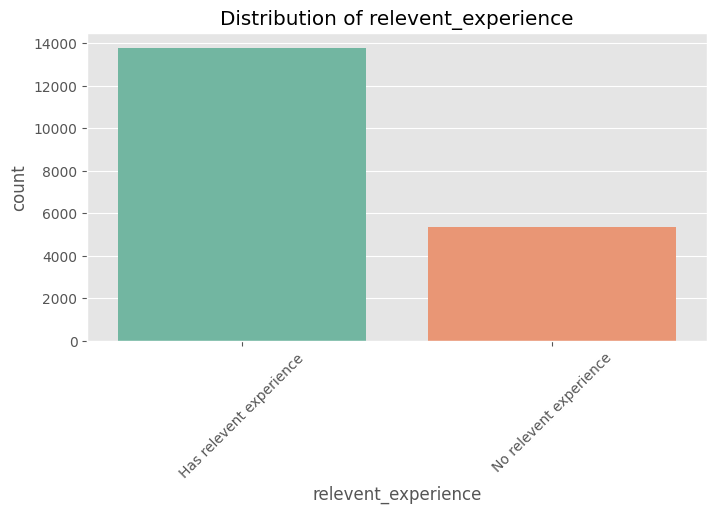

<ipython-input-6-efd76719a466>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


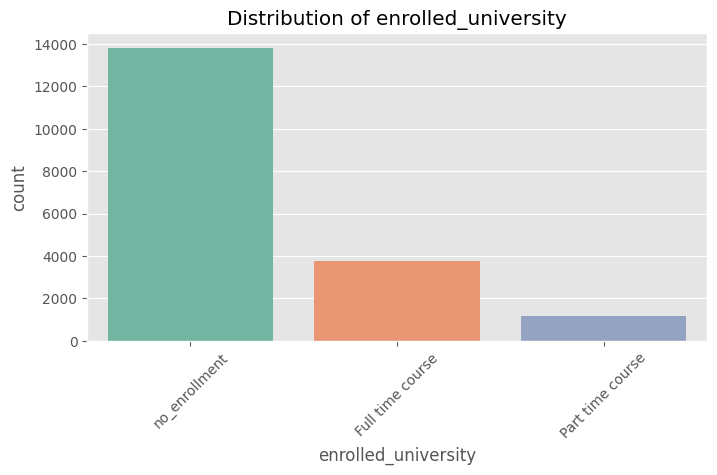

<ipython-input-6-efd76719a466>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


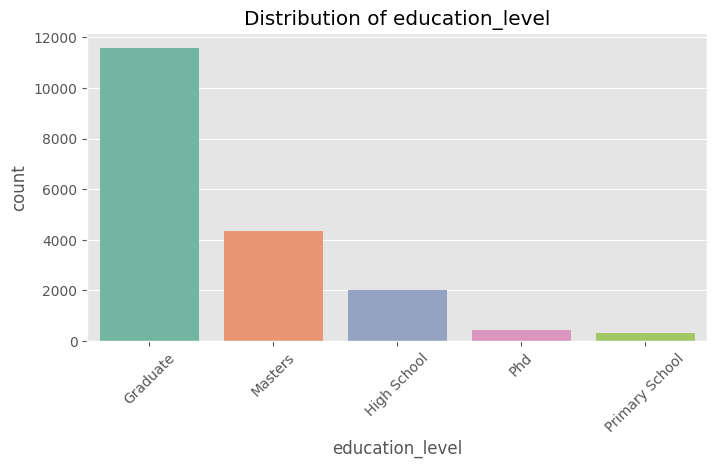

<ipython-input-6-efd76719a466>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


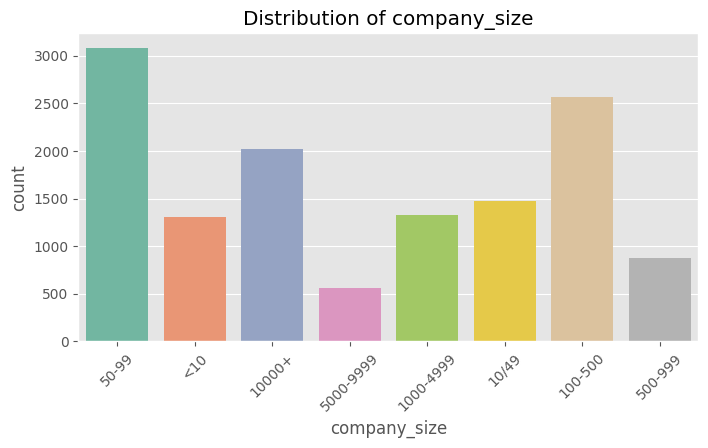

<ipython-input-6-efd76719a466>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


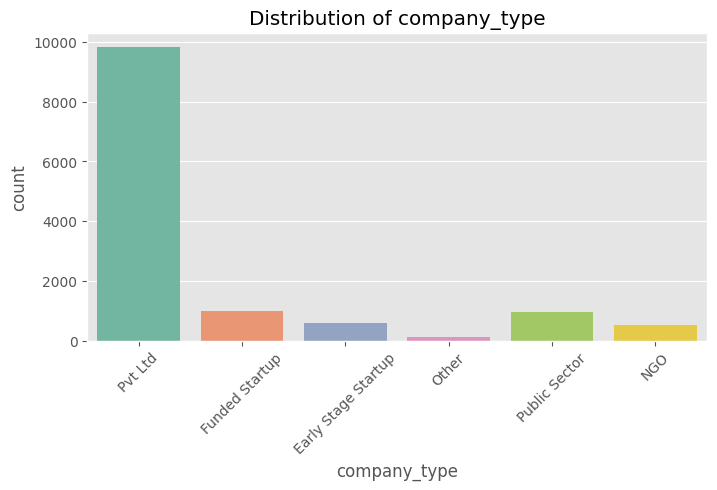

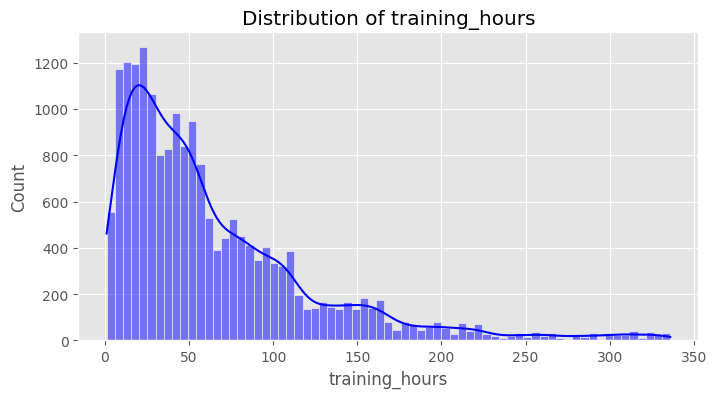

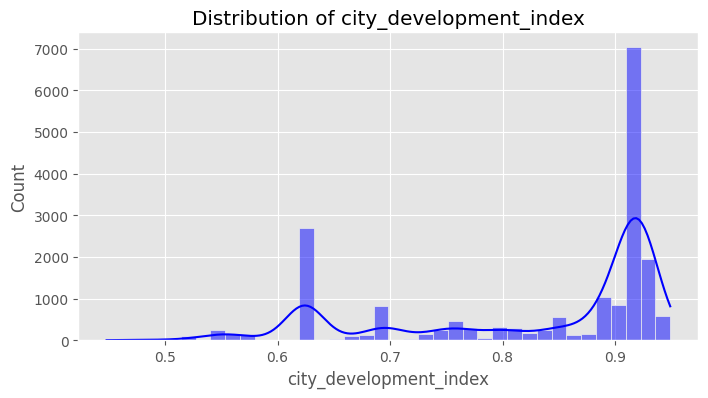

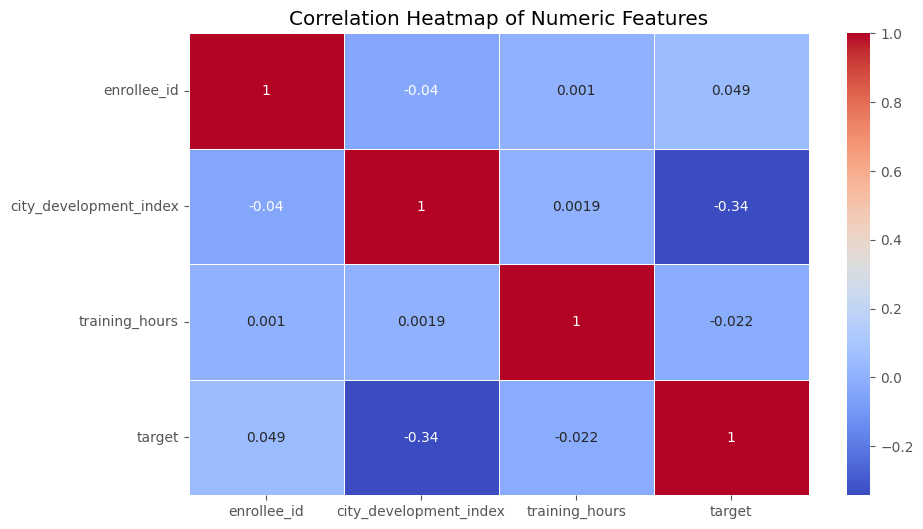

In [6]:
# Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better visuals
plt.style.use('ggplot')

# Visualize the distribution of categorical features
categorical_columns = ['gender', 'relevent_experience', 'enrolled_university', 'education_level', 'company_size', 'company_type']

# Plot the count of each category in categorical columns
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

# Visualize the distribution of numeric features using histograms
numeric_columns = ['training_hours', 'city_development_index']

for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f'Distribution of {col}')
    plt.show()

# Correlation heatmap for numerical features
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])  # Filter out non-numeric columns

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


### Phase 3: Modify
In this phase, we’ll deal with missing values, encode categorical variables, and scale/normalize numerical data if needed.

In [7]:
# Handle missing values by filling with appropriate strategies
# Fill missing values in categorical columns with the mode (most frequent value)
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Fill missing values in numeric columns with the median
df['training_hours'].fillna(df['training_hours'].median(), inplace=True)

# Check again for any remaining missing values
print("Remaining missing values after imputation:")
print(df.isnull().sum())

# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Scale numerical features if needed (optional step, depending on the model you choose)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded[['training_hours', 'city_development_index']] = scaler.fit_transform(df_encoded[['training_hours', 'city_development_index']])

# Display the first few rows of the modified dataset
df_encoded.head()


<ipython-input-7-ac4e1d39e2d0>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
<ipython-input-7-ac4e1d39e2d0>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

Remaining missing values after imputation:
enrollee_id                  0
city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline          2813
experience                  65
company_size                 0
company_type                 0
last_new_job               423
training_hours               0
target                       0
dtype: int64


,enrollee_id,city,city_development_index,major_discipline,experience,last_new_job,training_hours,target,gender_Male,gender_Other,...,company_size_10000+,company_size_50-99,company_size_500-999,company_size_5000-9999,company_size_<10,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,8949,city_103,0.738919,STEM,>20,1,-0.488985,1.0,True,False,...,False,True,False,False,False,False,False,False,False,True
1,29725,city_40,-0.428410,STEM,15,>4,-0.305825,0.0,True,False,...,False,True,False,False,False,False,False,False,False,True
2,11561,city_21,-1.660590,STEM,5,never,0.293607,0.0,True,False,...,False,True,False,False,False,False,False,False,False,True
3,33241,city_115,-0.323026,Business Degree,<1,never,-0.222571,1.0,True,False,...,False,True,False,False,False,False,False,False,False,True
4,666,city_162,-0.501368,STEM,>20,4,-0.955209,0.0,True,False,...,False,True,False,False,False,True,False,False,False,False


### Phase 4: Model
In this phase, we will build a predictive model to solve our problem. Since the goal of this dataset is to predict whether a job-seeking candidate will change jobs, we'll apply a classification model.

We’ll start by splitting the data into training and testing sets, then train a logistic regression model as our baseline.

Non-numeric columns: Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.93      0.86      2880
         1.0       0.60      0.31      0.41       952

    accuracy                           0.78      3832
   macro avg       0.70      0.62      0.64      3832
weighted avg       0.75      0.78      0.75      3832

Accuracy Score: 0.776356993736952


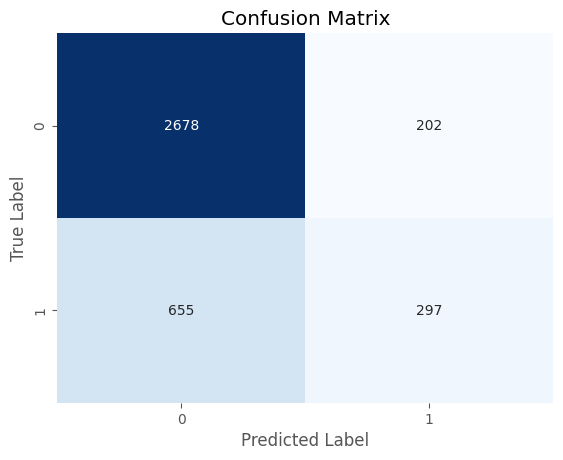

In [14]:
# Import necessary libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Check for any non-numeric columns in the dataset
non_numeric_columns = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

# Apply one-hot encoding to all remaining non-numeric columns
df_encoded = pd.get_dummies(df, columns=non_numeric_columns, drop_first=True)

# Display the first few rows to confirm encoding
df_encoded.head()

# Proceed with the modeling process as follows:
# Define the target variable and features
X = df_encoded.drop('target', axis=1)  # 'target' is the column we're trying to predict
y = df_encoded['target']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


### Phase 5: Assess
In this final phase, we evaluate the model's performance to determine how well it generalizes to unseen data. We will analyze various performance metrics, review the confusion matrix, and decide whether the model is suitable for deployment or requires further improvements.

### Key Metrics to Assess:
1. Accuracy Score: Measures the percentage of correct predictions.
2. Precision, Recall, F1-Score: Helps to understand the model’s performance in handling true positives and false positives, especially useful for imbalanced data.
3. Confusion Matrix: Visualizes true positives, false positives, true negatives, and false negatives.
4. ROC Curve and AUC Score: A performance measure to evaluate classification models, specifically showing the tradeoff between the true positive rate and false positive rate.

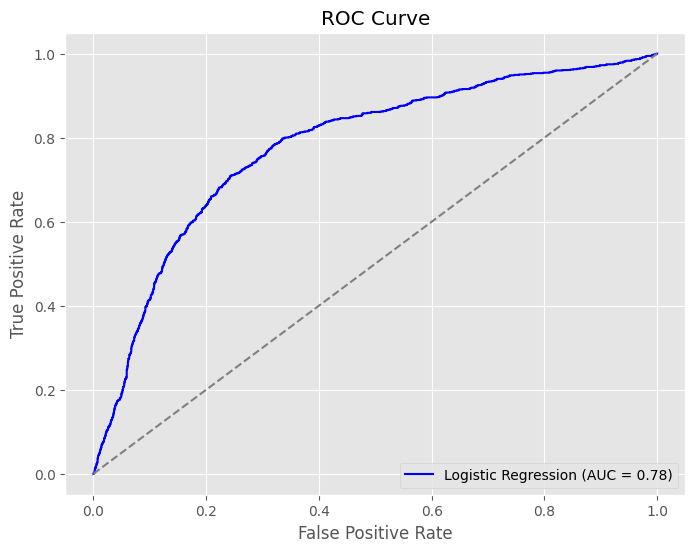

AUC Score: 0.78
Accuracy Score: 0.776356993736952
Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.93      0.86      2880
         1.0       0.60      0.31      0.41       952

    accuracy                           0.78      3832
   macro avg       0.70      0.62      0.64      3832
weighted avg       0.75      0.78      0.75      3832



In [15]:
# Import necessary libraries for ROC and AUC analysis
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate the AUC-ROC score
y_pred_prob = model.predict_proba(X_test)[:,1]  # Get probabilities for the positive class (1)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Display AUC Score
print(f"AUC Score: {roc_auc:.2f}")

# Overall assessment of the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


## Model Improvement

### Hyperparameter Tuning:
Use techniques like GridSearchCV or RandomizedSearchCV to optimize your model’s hyperparameters.

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and the best accuracy score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found:  {'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 200}
Best accuracy found:  0.778351141658925


### Model Validation:
Perform cross-validation to ensure the model generalizes well to unseen data.
K-Fold Cross-Validation: Split your data into k-folds and ensure that each fold is used as a test set once while the others are used for training.

In [17]:
from sklearn.model_selection import cross_val_score

# Perform K-Fold Cross-Validation
scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", scores)
print("Mean CV Accuracy:", scores.mean())


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-Validation Accuracy Scores: [0.77870564 0.78131524 0.7776618  0.78079332 0.77296451 0.76878914
 0.77296451 0.78444676 0.75874674 0.79060052]
Mean CV Accuracy: 0.7766988177066015


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
